In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import TCS_functions as tcs

In [2]:
# Sample data
sample_data = {
    'Country': ['United States', 'Canada', 'Brazil', 'United Kingdom', 'Germany', 'France', 'India', 'China', 'Japan', 'Australia'],
    'Sales': [1000, 850, 780, 920, 670, 600, 950, 1100, 730, 680]
}
sample_df = pd.DataFrame(sample_data)

# Plotting with plotly
fig = px.choropleth(sample_df, locations="Country",
                    locationmode='country names',
                    color="Sales",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title='Sales Data by Country')
fig.show()


In [3]:
# For our dataset:

index = tcs.df_indice_list()
data = tcs.generate_all_data()
countries = tcs.country_list()
sales = []

for country in countries:
        sales.append(data[f'{country}'][index['country_monthly_total_sales']][f'{country} Total Sales by Month']['Sales ($)'].sum())


c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:162: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future vers

In [4]:
data_dict = {'Country':countries,'Sales ($)':sales}
data_df = pd.DataFrame(data_dict)
data_df

,Country,Sales ($)
0,USA,3627982.83
1,Germany,220472.09
2,Norway,307463.70
3,Spain,1215686.92
4,Denmark,245637.15
5,Italy,374674.31
6,Philippines,94015.73
7,UK,478880.46
8,Sweden,210014.21
9,France,1110916.52


In [5]:
fig = px.choropleth(data_dict, locations="Country",
                    locationmode='country names',
                    color="Sales ($)",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title='Sales Data by Country')
fig.show()


In [6]:
data = tcs.generate_all_data()
data

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:162: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future vers

{'USA': [          USA Orders by Month
                         Orders
  January                    69
  February                   66
  March                      71
  April                      53
  May                        85
  June                       48
  July                       56
  August                    112
  September                  44
  October                   119
  November                  205
  December                   76,
     USA Orders by Quarter
                    Orders
  Q1                   206
  Q2                   186
  Q3                   212
  Q4                   400,
            USA Total Sales by Month
                           Sales ($)
  January                  232862.07
  February                 248421.79
  March                    268806.28
  April                    207625.70
  May                      300412.73
  June                     175897.42
  July                     207946.16
  August                   397979.10
  September

In [7]:
# Generating the dataframes showin the top three sale/orders countries

index = tcs.df_indice_list()
data = tcs.generate_all_data()
countries = tcs.country_list()
sales = []
orders = []

for country in countries:
        sales.append(data[f'{country}'][index['country_monthly_total_sales']][f'{country} Total Sales by Month']['Sales ($)'].sum())
        orders.append(data[f'{country}'][index['country_orders_by_month']][f'{country} Orders by Month']['Orders'].sum())



c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:162: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future vers

In [8]:
orders_dict = {'Country':countries,'Orders':orders}
sales_dict = {'Country':countries,'Sales ($)':sales}

orders_df = pd.DataFrame(orders_dict).sort_values(by='Orders',ascending=False)
sales_df = pd.DataFrame(sales_dict).sort_values(by='Sales ($)',ascending=False)

orders_df = orders_df.head(3)
sales_df = sales_df.head(3)

In [9]:
orders_df

,Country,Orders
0,USA,1004
3,Spain,342
9,France,314


In [10]:
sales_df = sales_df.head(3)
sales_df

,Country,Sales ($)
0,USA,3627982.83
3,Spain,1215686.92
9,France,1110916.52


In [11]:
def top_three_country():
    index = tcs.df_indice_list()
    data = tcs.generate_all_data()
    countries = tcs.country_list()
    sales = []
    orders = []

    for country in countries:
            sales.append(data[f'{country}'][index['country_monthly_total_sales']][f'{country} Total Sales by Month']['Sales ($)'].sum())
            orders.append(data[f'{country}'][index['country_orders_by_month']][f'{country} Orders by Month']['Orders'].sum())

    orders_dict = {'Country':countries,'Orders':orders}
    sales_dict = {'Country':countries,'Sales ($)':sales}

    orders_df = pd.DataFrame(orders_dict).sort_values(by='Orders',ascending=False)
    sales_df = pd.DataFrame(sales_dict).sort_values(by='Sales ($)',ascending=False)

    orders_df = orders_df.head(3)
    sales_df = sales_df.head(3)

    return orders_df, sales_df
            

In [12]:
test_orders, test_sales = top_three_country()

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:162: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future vers

In [13]:
test_orders

,Country,Orders
0,USA,1004
3,Spain,342
9,France,314


In [14]:
test_sales

,Country,Sales ($)
0,USA,3627982.83
3,Spain,1215686.92
9,France,1110916.52


In [15]:
usa_data = tcs.TCSpipelineCountry(country='USA')
tcs.fill_m_q_p(usa_data)

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:162: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



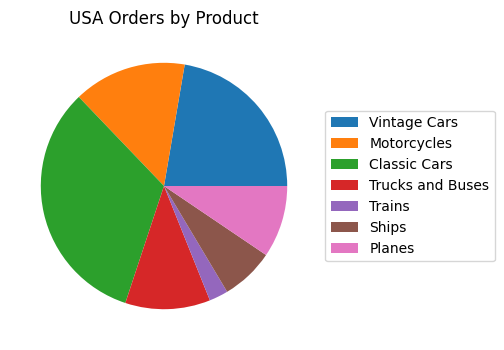

In [16]:
usa_product_pie = tcs.return_pie_plot_orders_country(data=usa_data,country_name='USA')

In [17]:
usa_data = tcs.TCSpipelineCountry(country='USA')
tcs.fill_m_q_p(usa_data)

data_indices = tcs.df_indice_list()
country_product_orders_index = data_indices['country_orders_per_product']
product_data = usa_data[country_product_orders_index]
#products = product_data['Country']
orders = list(product_data[0].values)
products = list(product_data[0].index)

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:152: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.

c:\Users\cochr\OneDrive\Libertas Data\Projects\Example Projects\Toy Car Sales Project\tcs_streamlit\TCS_functions.py:162: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



In [18]:
orders

[224, 149, 329, 112, 25, 70, 95]

In [19]:
products

['Vintage Cars',
 'Motorcycles',
 'Classic Cars',
 'Trucks and Buses',
 'Trains',
 'Ships',
 'Planes']